In [2]:
%pylab inline
import tensorflow as tf
import struct, gzip
import Image
from tensorflow.examples.tutorials.mnist import input_data

Populating the interactive namespace from numpy and matplotlib


In [3]:
# TensorFlow already includes the MNIST data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


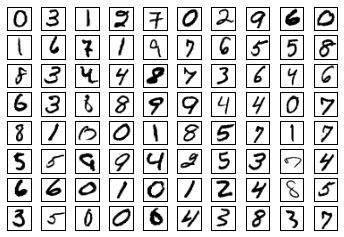

In [4]:
fig, subplots = pylab.subplots(8, 10) # subplots(y축, x축 갯수)

idx = 10
for _subs in subplots:
    for subplot in _subs:
        d = mnist.train.images[idx]
        subplot.get_xaxis().set_visible(False)
        subplot.get_yaxis().set_visible(False)
        subplot.imshow(d.reshape(28, 28), cmap=cm.gray_r)
        idx += 1


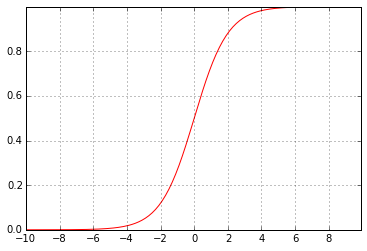

In [5]:
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))
xticks(np.arange(-10, 10, 2))
yticks(np.arange(0, 1, 0.2))
grid()
plot(x, y, color='red')

In [7]:
def cal_net_input(x, w=np.zeros([784, 10]), bias=np.zeros(10)):
    """
    x: 784개의 arrays를 갖은 array
        ex) [[ 0.  0.  0. ...,  0.  0.  0.] <- 784 array
             [ 0.  0.  0. ...,  0.  0.  0.]]
    """
    # Make Evidence
    # y값은 다음과 같이 나옵니다.
    # [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
    #  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    y = np.matmul(x, w) + bias
    return y

def cal_softmax(logits):
    """
    np.exp(logits) -> [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 
                       [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    np.sum(np.exp(logits), axis=1)) -> [ 10.  10.]
    np.exp(logits).T -> [[ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]
                         [ 1.  1.]]
    """
    # Softmax Regression or Normalization
    return (np.exp(logits).T/ np.sum(np.exp(logits), axis=1)).T

def cal_cross_entropy(predicted_y, y_):
    """
    predicted_y: n * 10 arrays 
        0~9까지의 각각의 확률을 갖고 있는 예측값
        ex) [[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1],
             [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
                   
    y_: n * 10 arrays를 갖고있으며, 실제 정답이 되는 값을 갖고 있다.
        ex) [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
    
    주의할점은 y_ * log(y) 에서 dot multiplication 을 쓰는게 아니라 그냥 multiplication을 해준다.
    """
    return np.mean(-np.sum(y_ * np.log(predicted_y), 1))  

In [1]:
w_np = np.zeros([784, 10])
b_np = np.zeros(10)

x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
evidence = tf.matmul(x, w) + b
y = tf.nn.softmax(evidence)
# y = tf.exp(evidence)/tf.reduce_sum(tf.exp(tf.matmul(x, w) + b), reduction_indices=[0])
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)


NameError: name 'np' is not defined

In [11]:

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

batch_xs, batch_ys = mnist.train.next_batch(1)

# Numpy
#     predicted_y = cal_softmax(cal_net_input(batch_xs))
#     print predicted_y
#     cross_entropy_data = cal_cross_entropy(predicted_y, batch_ys)
#     print cross_entropy_data

#
# plt.imshow(batch_xs.reshape(28, 28), cmap=cm.gray_r)
print batch_ys
print sess.run(evidence, feed_dict={x: batch_xs})


[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]
[[ -2.42279029  -4.02547789   0.96210015  11.00868225  -3.51601672
    2.16432548  -5.92554903  -1.15477586   2.24260139   0.66694319]]


In [19]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}, session=sess)

0.9208
